In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

%matplotlib inline
%load_ext pycodestyle_magic
#

# %%pycodestyle  # Parked for using in the following cells

## Business Understanding

In this project, we will take a closer look at Airbnb listings in Seattle. This will help us discover some important aspects of the Airbnb rental scene in Seattle.

Research Questions
We will be trying to answer 3 research questions:

1) Are there any seasonal courses in price and number of listings?
2) Are certain areas in Seattle particularly expensive and are there seasonal trends/differences?
3) What other factors affect the Airbnb prices in Seattle?
4) What might be a valid predictor of a “reasonable” price for potential hosts or guests?


## Gather Data

We will work with 3 public Airbnb datasets available at Kaggle.com (https://www.kaggle.com/datasets/airbnb/seattle/data?select=reviews.csv):

a) Listings: including information about the host, place, review score, prices, and many more. In general, it includes all the information related to the posting made by the host and also reviews given by the guest.

b) Reviews: including details of the reviewer and their detailed comments about place they stayed.

c) Calendar: including all nformation about the availability of the place on each day an the priceavailability for that day.

### Step 1: Gather & Exploring Data calendar.csv 

In [2]:
# Import Data calendar.csv
df_cal = pd.read_csv(r"D:\Marc\BMW Hammer\Udacity Data Science\Project 1 Write a Data Science Blog Post\Data\calendar.csv")
df_cal.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [3]:
df_cal.info()  # Structure df_calendar Columns, Non-Nulls, Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
df_cal.shape # Shape of df_calendar rows, columns

(1393570, 4)

### Step 2: Gather & Exploring Data Data listings.csv 

In [5]:
# Import Data listings.csv
df_list = pd.read_csv(r"D:\Marc\BMW Hammer\Udacity Data Science\Project 1 Write a Data Science Blog Post\Data\listings.csv")
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
df_list.info() # Structure df_listings Columns, Non-Nulls, Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [7]:
df_list.shape # Shape of df_calendar rows, columns

(3818, 92)

In [8]:
df_list.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### Step3: Gather & Exploring Data reviews.csv 

In [9]:
# Import Data reviews.csv
df_rev = pd.read_csv(r"D:\Marc\BMW Hammer\Udacity Data Science\Project 1 Write a Data Science Blog Post\Data\reviews.csv")
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [11]:
df_rev.shape # Shape of df_reviews rows, columns

(84849, 6)

## Question 1: Are there any seasonal courses in price and number of listings?

### Step 1: Clean & analyze data in df_cal
Date data is converted from object in int and separated in 3 columns year, month, number of day.
available is also converted in numeric data

In [12]:
# Functions for Data Preparation
def price_float(x):
    '''
    input: prive value in dollar with string dtype
    output: price value in float
    '''
    if type(x)==str:
        x = x[1:].replace(",","")
        x = float(x)
    return x


# Removes rows missing price data since we are interested in price vairability
df_cal.dropna(subset = ['price'], inplace=True)

# Convert dollar dtype to float
df_cal['price'] = df_cal['price'].apply(lambda x: price_float(x))

# Create Year, Month, Day, Day Name columns after convering date into datetime
df_cal['date'] = pd.to_datetime(df_cal['date'], format="%Y-%m-%d")
df_cal['year'] = df_cal['date'].dt.year
df_cal['month'] = df_cal['date'].dt.month
df_cal['day_num'] = df_cal['date'].dt.weekday

# Covert available to numeric data
df_cal['available'] = df_cal['available'].apply(lambda x:1 if x =='t' else 0)

df_cal.head() # Check structure of df_cal


,listing_id,date,available,price,year,month,day_num
0,241032,2016-01-04,1,85.0,2016,1,0
1,241032,2016-01-05,1,85.0,2016,1,1
9,241032,2016-01-13,1,85.0,2016,1,2
10,241032,2016-01-14,1,85.0,2016,1,3
14,241032,2016-01-18,1,85.0,2016,1,0


In [13]:
df_cal.describe() # Check structure of df_cal

,listing_id,date,available,price,year,month,day_num
count,9.345420e+05,934542,934542.0,934542.000000,934542.000000,934542.000000,934542.000000
mean,5.305517e+06,2016-07-08 08:12:42.911458816,1.0,137.944859,2016.006097,6.661120,2.990591
min,3.335000e+03,2016-01-04 00:00:00,1.0,10.000000,2016.000000,1.000000,0.000000
25%,2.875975e+06,2016-04-07 00:00:00,1.0,75.000000,2016.000000,4.000000,1.000000
50%,5.615620e+06,2016-07-08 00:00:00,1.0,109.000000,2016.000000,7.000000,3.000000
75%,7.873345e+06,2016-10-09 00:00:00,1.0,160.000000,2016.000000,10.000000,5.000000
max,1.034016e+07,2017-01-02 00:00:00,1.0,1650.000000,2017.000000,12.000000,6.000000
std,2.974821e+06,NaN,0.0,105.062870,0.077846,3.446401,2.004433


In [14]:
df_cal.groupby('month').available.sum() # Test groupby 'month' -> all int, from 1 to 12. 

month
1     64937
2     73321
3     83938
4     76037
5     79971
6     77244
7     74222
8     76347
9     77246
10    82438
11    81780
12    87061
Name: available, dtype: int64

In [15]:
df_cal.groupby('price').available.sum() # Test groupby 'month' -> all int 

price
10.0        1
12.0        1
20.0      365
22.0       21
23.0        4
         ... 
1199.0     71
1240.0      2
1250.0     15
1450.0     28
1650.0     91
Name: available, Length: 669, dtype: int64

First, we create a line-chart of average price and total number of listings per month to see seasonal course

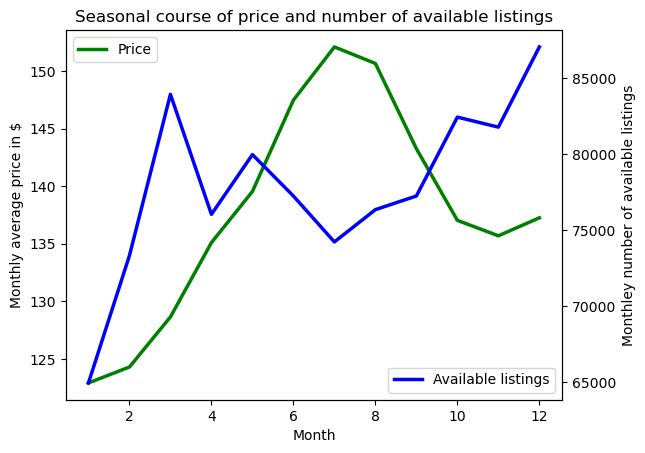

In [16]:
# Graph of average price and total number of listings per month to see seasonal course
fig,ax = plt.subplots()
ax.plot(df_cal.groupby(['month']).price.mean(),color='green', marker='', linewidth=2.5, label='Price')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly average price in $')

ax2 = ax.twinx()
ax2.plot(df_cal.groupby(['month']).available.sum(), color='blue', marker ='', linewidth=2.5, label='Available listings')
ax2.set_ylabel('Monthley number of available listings')

ax.legend(loc=2)
ax2.legend(loc=4)

plt.title('Seasonal course of price and number of available listings')
plt.show()


### Conclusion: Highest prices at holiday season in summer (july/august) comes in line with low listings.

### Step 2: we create a heatmap,that also indicates a high correlation between price and month

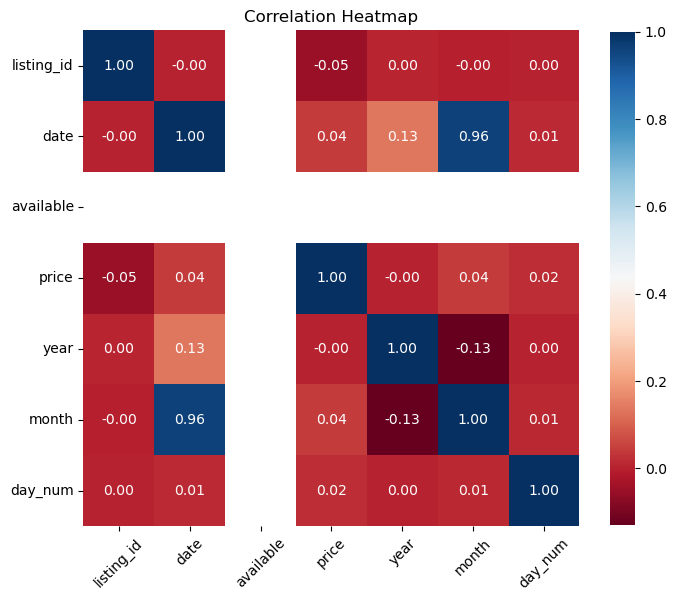

In [17]:
# Heatmap also indicates a high correlation between price and month  
# Calculate the correlation matrix
corr = df_cal.corr()

# Create a heatmap with annotations
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', square=True, cbar_kws={"shrink": .8}) #alternative colours: 'coolwarm' cool to warm colors, 'RdBu' red-to-blue, 'Spectral'

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

### Step 3: we create a line-chartof average price and total listing to weekly patterns

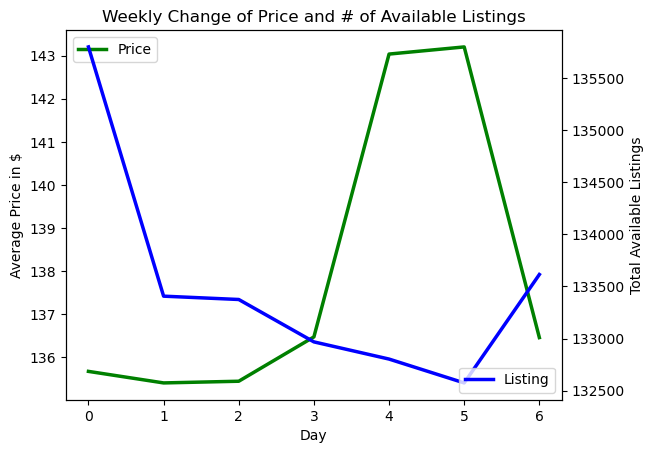

In [18]:
# graph of average price and total listing to weekly patterns
fig,ax = plt.subplots()
ax.plot(df_cal.groupby(['day_num']).price.mean(),color='green', marker='', linewidth=2.5, label='Price')
ax.set_xlabel('Day') # Day 0=Monday, ....6=Sunday
ax.set_ylabel('Average Price in $')

ax2 = ax.twinx()
ax2.plot(df_cal.groupby(['day_num']).available.sum(), color='blue', marker ='', linewidth=2.5, label="Listing")
ax2.set_ylabel('Total Available Listings')

ax.legend(loc=2)
ax2.legend(loc=4)

plt.title('Weekly Change of Price and # of Available Listings')
plt.show()


### Conclusion: Lowest prices in first half of the week, highes number of listing on monday. Highest prices at friday/saturday.

## Question 2: Are certain areas in Seattle particularly expensive and are there seasonal trends?
### Step 1: Clean data in df_cal, df_list and merge both, explore data in resulting df_m

In [19]:
# merge datasets df_list with df_cal via listing_id

df_list = df_list.rename(index=str, columns={"id": "listing_id"})
df_m = pd.merge(df_cal, df_list, on = 'listing_id')

# df_m.head() #Check structure of df_m


In [20]:
# Copy df_m to df_m_c for further data preparation

df_m_c = df_m.copy()   # "c" means coppy for further "corrections"

# df_m_c.head() #Check structure of df_m_c   #check of the merge
# df_m_c.describe()                          #check of the merge
df_m_c.info()  # Structure df_calendar Columns, Non-Nulls, Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934542 entries, 0 to 934541
Data columns (total 98 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   listing_id                        934542 non-null  int64         
 1   date                              934542 non-null  datetime64[ns]
 2   available                         934542 non-null  int64         
 3   price_x                           934542 non-null  float64       
 4   year                              934542 non-null  int32         
 5   month                             934542 non-null  int32         
 6   day_num                           934542 non-null  int32         
 7   listing_url                       934542 non-null  object        
 8   scrape_id                         934542 non-null  int64         
 9   last_scraped                      934542 non-null  object        
 10  name                            

<Axes: title={'center': 'Missing values per column, %'}>

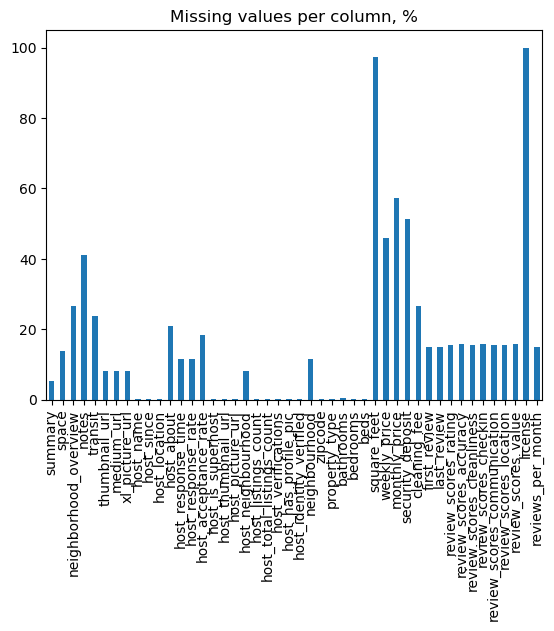

In [21]:
# Identification of columns with high share of missing values

listings_missing_df = df_m_c.isnull().mean()*100

listings_columns_with_nan = listings_missing_df[listings_missing_df > 0] #columns, which have missing values

listings_columns_with_nan.plot.bar(title='Missing values per column, %')


### Step 2: We delete all columns with high share of missing values and columns which are not related to the question 2 (areas/neighbourhoods, seasonal trend).

In [22]:
# Deletion of columns with high share of missing values and columns with "unsueful" criterias
df_m_c = df_m_c.drop(['date','available', 'host_id','host_location','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month'], axis=1)


In [23]:
# df_m_c.head() #Check structure of df_m_c   # check of the merge
# df_m_c.describe()                          # check of the merge
df_m_c.info()  # Structure df_calendar Columns, Non-Nulls, Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934542 entries, 0 to 934541
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   listing_id                        934542 non-null  int64  
 1   price_x                           934542 non-null  float64
 2   year                              934542 non-null  int32  
 3   month                             934542 non-null  int32  
 4   day_num                           934542 non-null  int32  
 5   host_since                        934450 non-null  object 
 6   host_response_time                826028 non-null  object 
 7   host_response_rate                826028 non-null  object 
 8   host_acceptance_rate              764235 non-null  object 
 9   host_is_superhost                 934450 non-null  object 
 10  host_listings_count               934450 non-null  float64
 11  host_verifications                934450 non-null  o

In [24]:
# remove rows with price_x == nan -> price nan not neded, will be used for prediction
df_m_c = df_m_c.dropna(subset=['price_x'])

# convert price to number and drop the price_x column
df_m_c['price'] = df_m_c['price_x'].astype(str)
df_m_c['price'] = df_m_c['price'].str.replace("[$, ]", "").astype("float")
df_m_c = df_m_c.drop(columns = ['price_x'])

### Step 3: now, we can also habe a look on the remaining quantitative columns (all-non-objects) and their values to get a idea of any further correlations, abnormalities,...

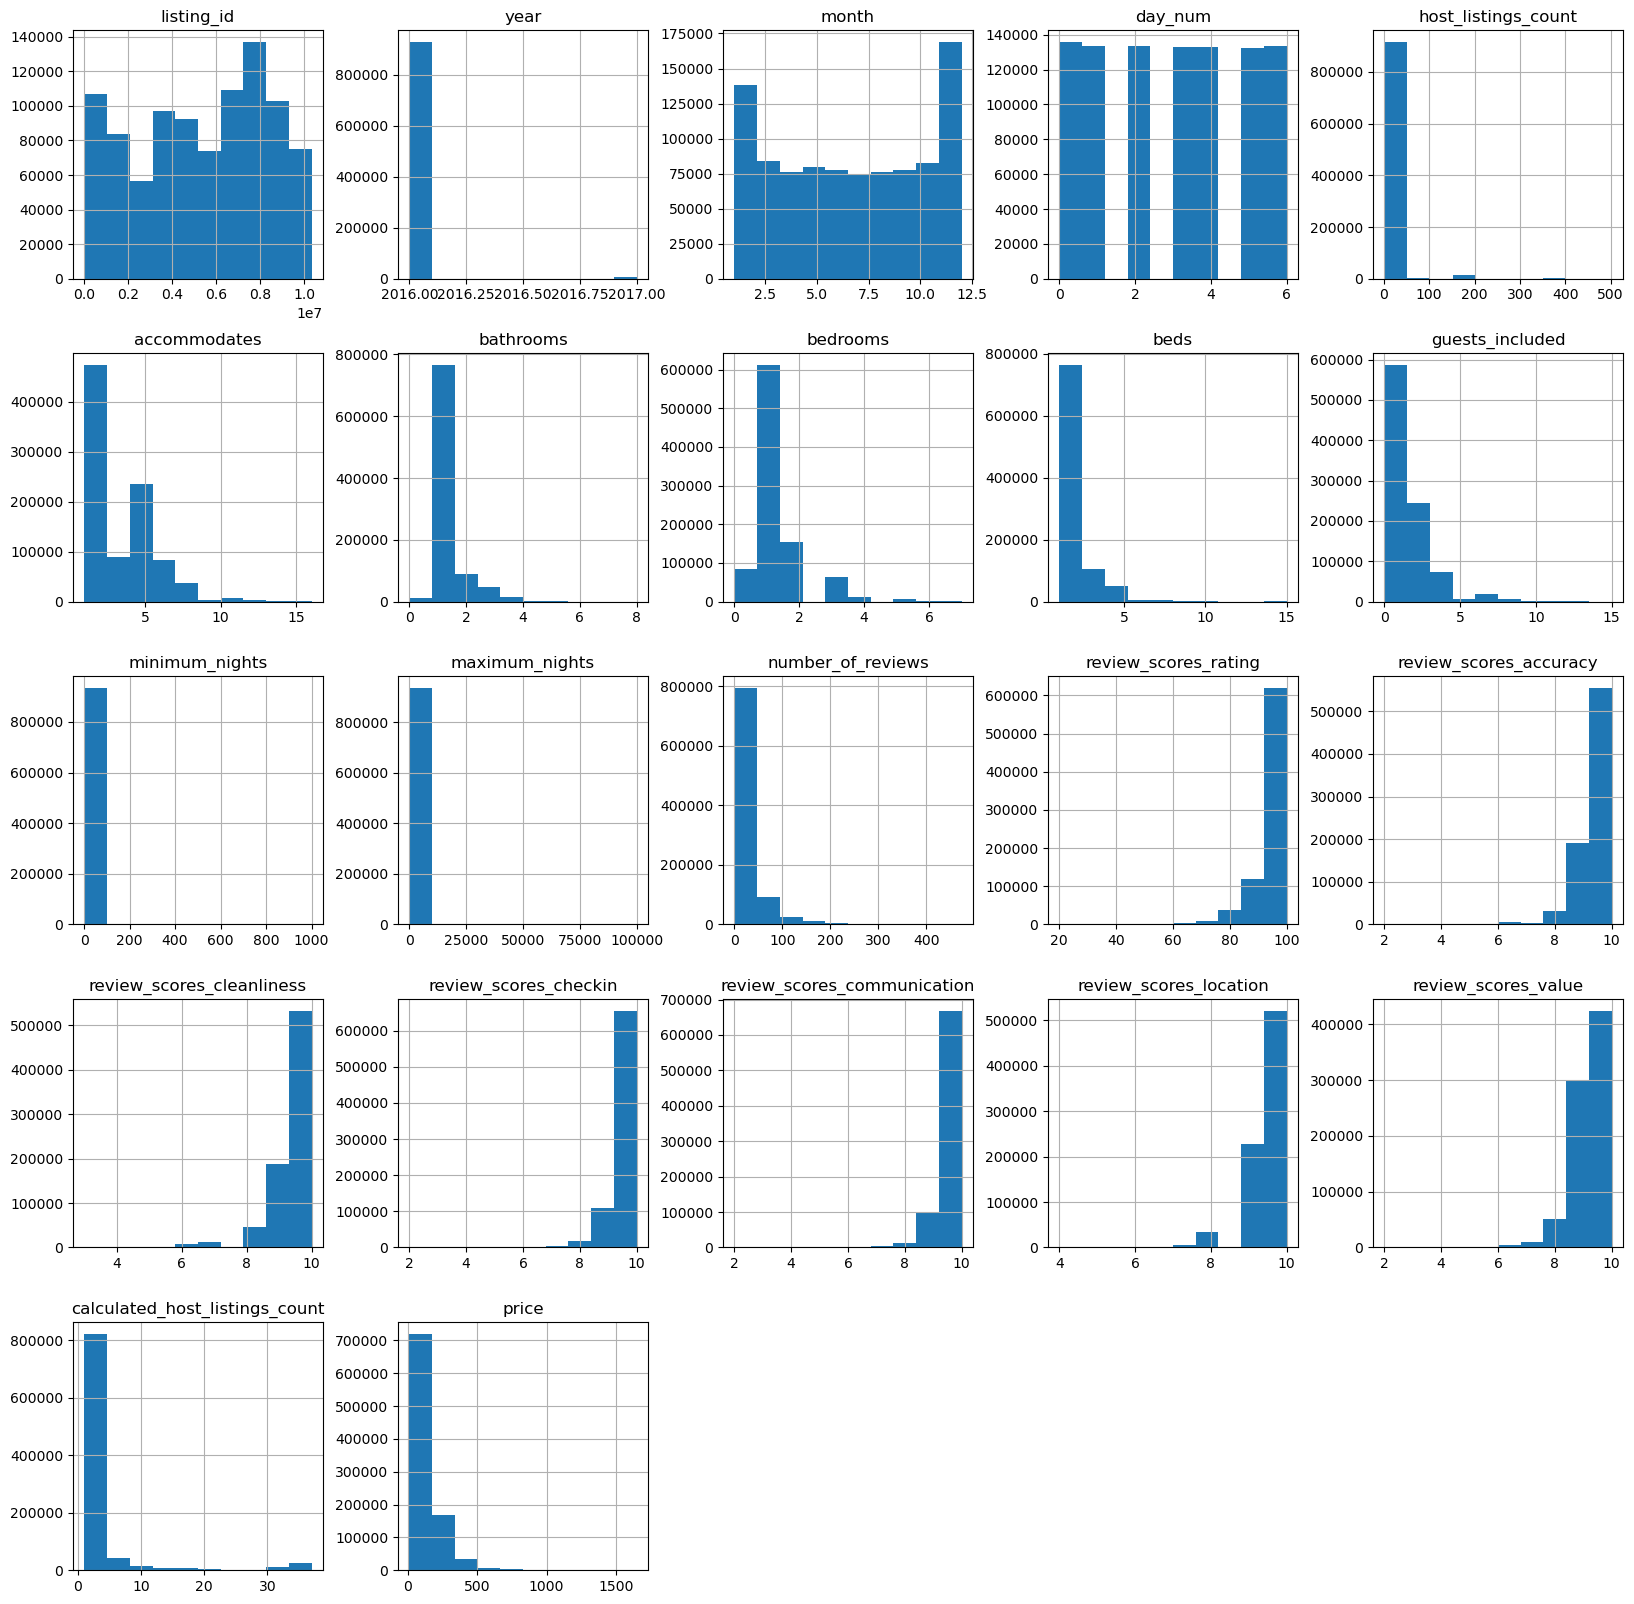

In [25]:
# check the distribution of each value
df_m_c.hist(figsize=(20,20))
plt.show()

In [26]:
df_m_c.info()  # Structure df_calendar Columns, Non-Nulls, Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934542 entries, 0 to 934541
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   listing_id                        934542 non-null  int64  
 1   year                              934542 non-null  int32  
 2   month                             934542 non-null  int32  
 3   day_num                           934542 non-null  int32  
 4   host_since                        934450 non-null  object 
 5   host_response_time                826028 non-null  object 
 6   host_response_rate                826028 non-null  object 
 7   host_acceptance_rate              764235 non-null  object 
 8   host_is_superhost                 934450 non-null  object 
 9   host_listings_count               934450 non-null  float64
 10  host_verifications                934450 non-null  object 
 11  host_has_profile_pic              934450 non-null  o

### Step 4: We can also have a closer look at the of number of listings depending on price.

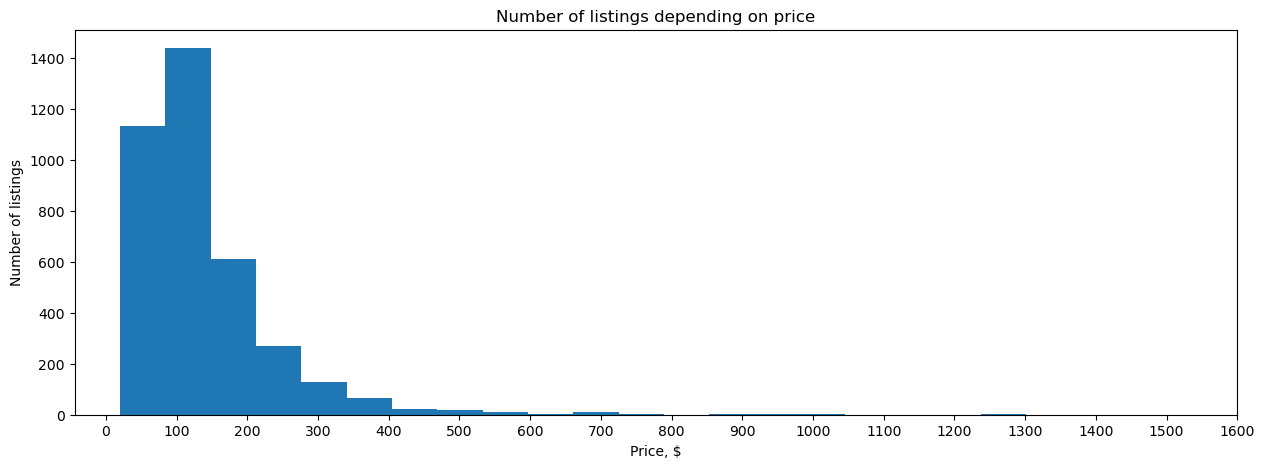

In [27]:
# Determination of average price for each listing

mean_price_listing = df_m_c['price'].groupby(df_m_c['listing_id']).mean()

#plot
plt.figure(figsize=(15,5))
plt.hist(mean_price_listing, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings depending on price')

#plt.savefig('Price distrubution of listings.png')      # saved png-File not needed at the moment

plt.show()

### Step 5: and finally we are looking at the price depending on neighbourhoods (and month)

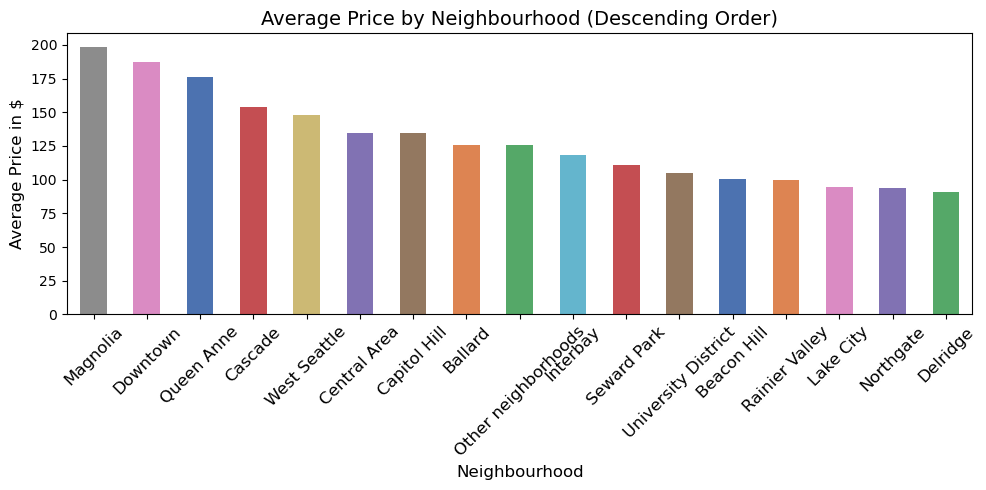

In [28]:
# Create a color palette for all figures
unique_neighborhoods = df_m_c['neighbourhood_group_cleansed'].unique()
palette = sns.color_palette("deep", len(unique_neighborhoods))  # Choose a color palette

# Create a mapping of neighborhoods to colors
color_mapping = dict(zip(unique_neighborhoods, palette))

# Average price by neighborhood (and sort in descending order)
average_price_by_neighbourhood = df_m_c.groupby(['neighbourhood_group_cleansed'])['price'].mean().sort_values(ascending=False)

# First figure: Bar plot average price in neighborhood
plt.figure(figsize=(10, 5))
average_price_by_neighbourhood.plot(kind='bar', color=[color_mapping[neighborhood] for neighborhood in average_price_by_neighbourhood.index])  # Use color mapping
plt.ylabel('Average Price in $', fontsize=12)  
plt.xlabel('Neighbourhood', fontsize=12)  
plt.title('Average Price by Neighbourhood (Descending Order)', fontsize=14)  
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability with bigger font
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Calculate average prices for sorting by month
average_price_by_month_neighbourhood = df_m_c.groupby(['month', 'neighbourhood_group_cleansed'])['price'].mean().unstack()

# Calculate mean prices for sorting
average_prices = average_price_by_month_neighbourhood.mean().sort_values(ascending=False)

# Reorder neighborhoods based on average prices
sorted_neighborhoods = average_prices.index


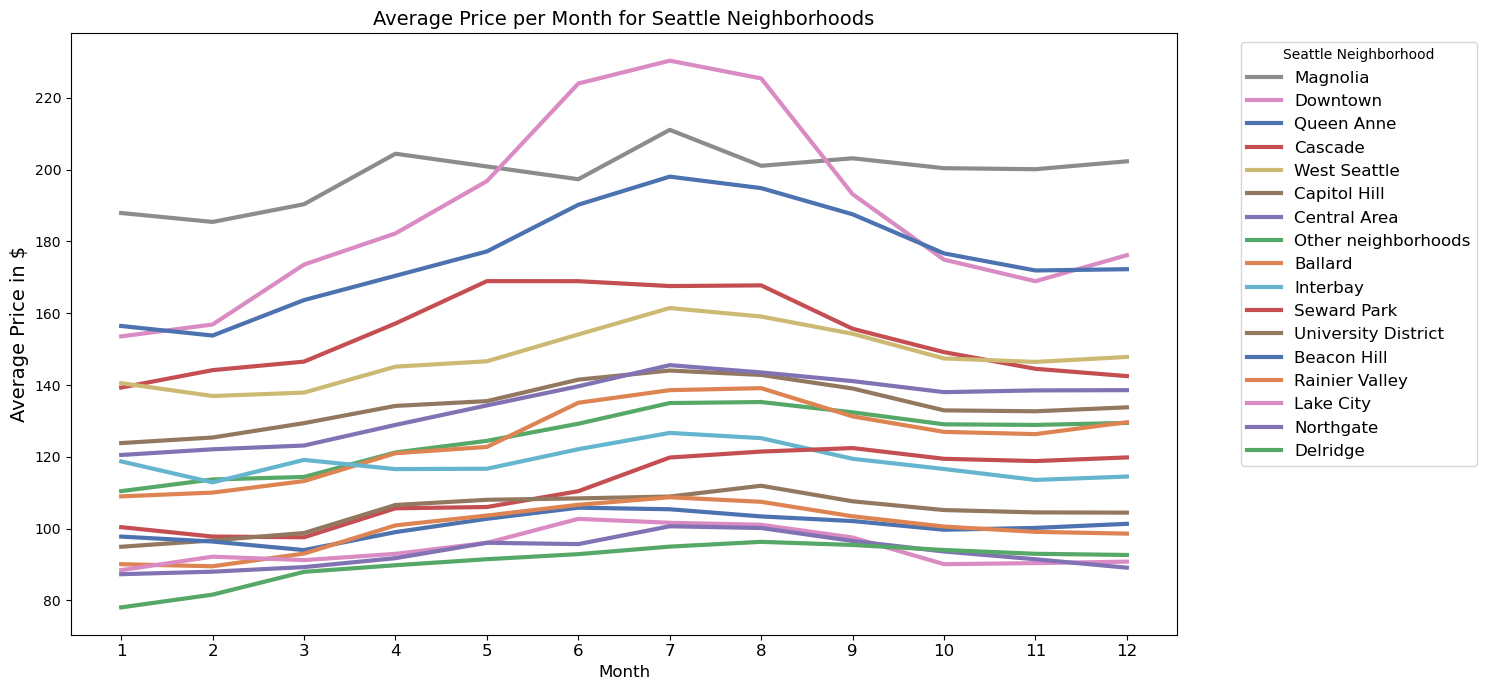

In [29]:
# Second figure: Line plot average price depending on neighbourhoods and month
plt.figure(figsize=(15, 7))
for neighborhood in sorted_neighborhoods:  # Use sorted neighborhoods
    neighborhood_data = average_price_by_month_neighbourhood[neighborhood]
    plt.plot(neighborhood_data.index, neighborhood_data, label=neighborhood, color=color_mapping[neighborhood], linewidth=3)  # Thicker lines

plt.ylabel('Average Price in $', fontsize=14)  
plt.xlabel('Month', fontsize=12)  
plt.title('Average Price per Month for Seattle Neighborhoods', fontsize=14)  
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)], fontsize=12)  # Set x-ticks for months 1 to 12 with bigger font
plt.legend(title='Seattle Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # Legend outside the plot with bigger font
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


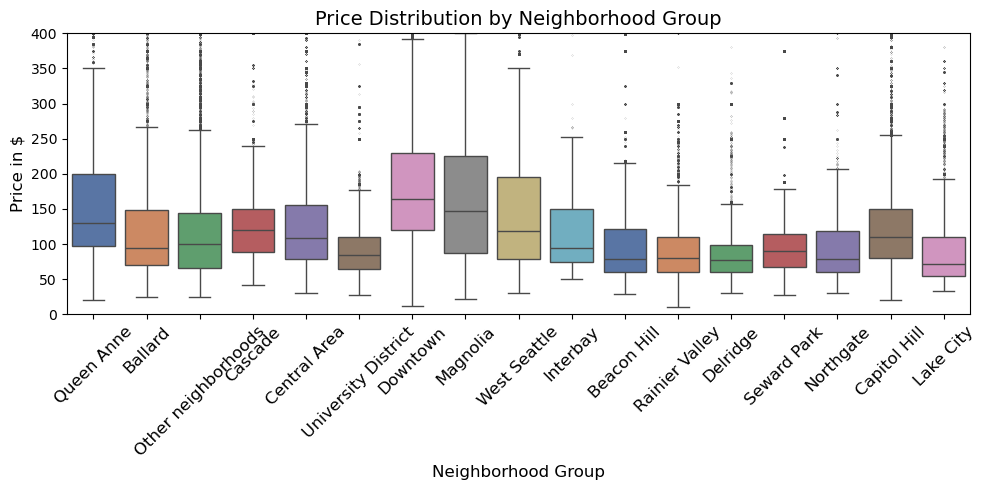

In [30]:
# Third figure: Boxplot with the same colors
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df_m_c, x='neighbourhood_group_cleansed', y='price', fliersize=0.1,hue='neighbourhood_group_cleansed', palette=color_mapping)

# Set the tick positions and labels
ax.set_xticks(range(len(unique_neighborhoods)))  # Set the positions
ax.set_xticklabels(unique_neighborhoods, rotation=45, fontsize=12)  # Set the labels with bigger font

ax.set_ylim(0, 400)
plt.title('Price Distribution by Neighborhood Group', fontsize=14)  # Bigger font for title
plt.ylabel('Price in $', fontsize=12)  # Bigger font for y-label
plt.xlabel('Neighborhood Group', fontsize=12)  # Bigger font for x-label
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Conclususion: Downtown is most expensive neighborhood during holiday season in summer, Magnolia is most is most expensive in average and on a constant high level during the whole year.      

## Question 3: What other factors affect the Airbnb prices in Seattle? 

### Step1: Therefore we make an analysis of price depending on other features.
We start and copy df_m_c to df_m_other_c for further data preparations and analysys. In a very first step we delete data which is not in fokus for question 4.

In [31]:
# Copy df_m_c to df_m_other_c for further data preparation (analysis on other/further features) 

df_m_other_c = df_m_c.copy()   # "ohter" means copy for analysys on other features

df_m_other_c = df_m_other_c.drop(['listing_id', 'year', 'day_num', 'host_response_time', 'host_acceptance_rate', 'host_verifications',
                                  'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture','require_guest_phone_verification', 
                                  'calculated_host_listings_count', 'neighbourhood_group_cleansed', 'maximum_nights', 'host_has_profile_pic', 
                                  'host_identity_verified', 'property_type','room_type', 'bed_type', 'amenities', 'host_is_superhost'], axis=1)



In [32]:
# Data preparation

def percent_float(x): # Function for conversion of percent-values to float
    '''
    input: %-value with string dtype
    output: %-value in float
    '''
    if type(x)==str:
        x=x.replace('%','')
        x=float(x)/100.0
    return (x)

# Conversion percent to float
df_m_other_c['host_response_rate'] = df_m_other_c['host_response_rate'].apply(lambda x:percent_float(x))

# Conversion price value (in dollar) dtype to float
df_m_other_c['security_deposit'] = df_m_other_c['security_deposit'].apply(lambda x:price_float(x))
df_m_other_c['cleaning_fee'] = df_m_other_c['cleaning_fee'].apply(lambda x:price_float(x))
df_m_other_c['extra_people'] = df_m_other_c['extra_people'].apply(lambda x:price_float(x))

# Converversion host_since to host_since_year as float
df_m_other_c['host_since'] = pd.to_datetime(df_m_other_c['host_since'],format="%Y-%m-%d")
df_m_other_c['host_since_year'] = df_m_other_c['host_since'].dt.year
df_m_other_c = df_m_other_c.drop(['host_since'], axis=1)


In [33]:
df_m_other_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934542 entries, 0 to 934541
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   month                        934542 non-null  int32  
 1   host_response_rate           826028 non-null  float64
 2   host_listings_count          934450 non-null  float64
 3   accommodates                 934542 non-null  int64  
 4   bathrooms                    929739 non-null  float64
 5   bedrooms                     932539 non-null  float64
 6   beds                         934177 non-null  float64
 7   security_deposit             456421 non-null  float64
 8   cleaning_fee                 686547 non-null  float64
 9   guests_included              934542 non-null  int64  
 10  extra_people                 934542 non-null  float64
 11  minimum_nights               934542 non-null  int64  
 12  number_of_reviews            934542 non-null  int64  
 13 

### Step 2: we look for columns with missing values and fill them with mean-values

<Axes: title={'center': 'Missing values per column, %'}>

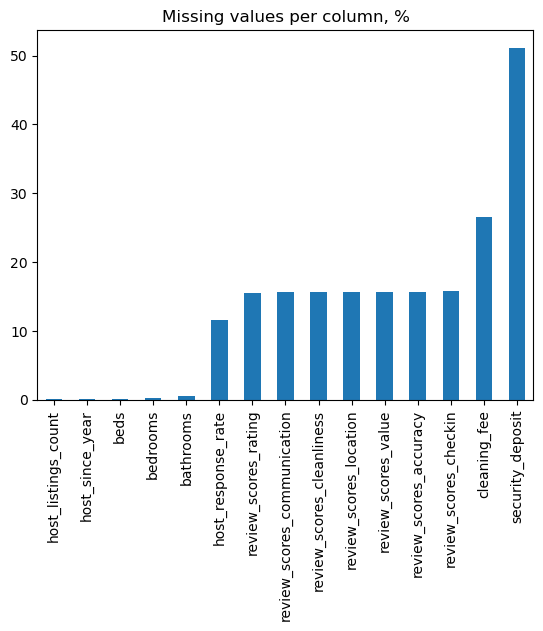

In [34]:
# anaylze percentage of missing values in each column
df_m_other_c_missing = df_m_other_c.isnull().mean()*100

# filter out columns, which have missing values
df_m_other_c_columns_with_nan = df_m_other_c_missing[df_m_other_c_missing > 0]

# plot the results
df_m_other_c_columns_with_nan.sort_values().plot.bar(title='Missing values per column, %')


In [35]:
# Fill missing values with mean for numeric columns

num_vars = df_m_other_c.select_dtypes(include=['float', 'int']).columns

for col in num_vars:
    # Use .loc to avoid chained assignment warning
    df_m_other_c.loc[:, col] = df_m_other_c[col].fillna(df_m_other_c[col].mean())

# print(df_m_other_c[num_vars].isnull().sum()) #Test 


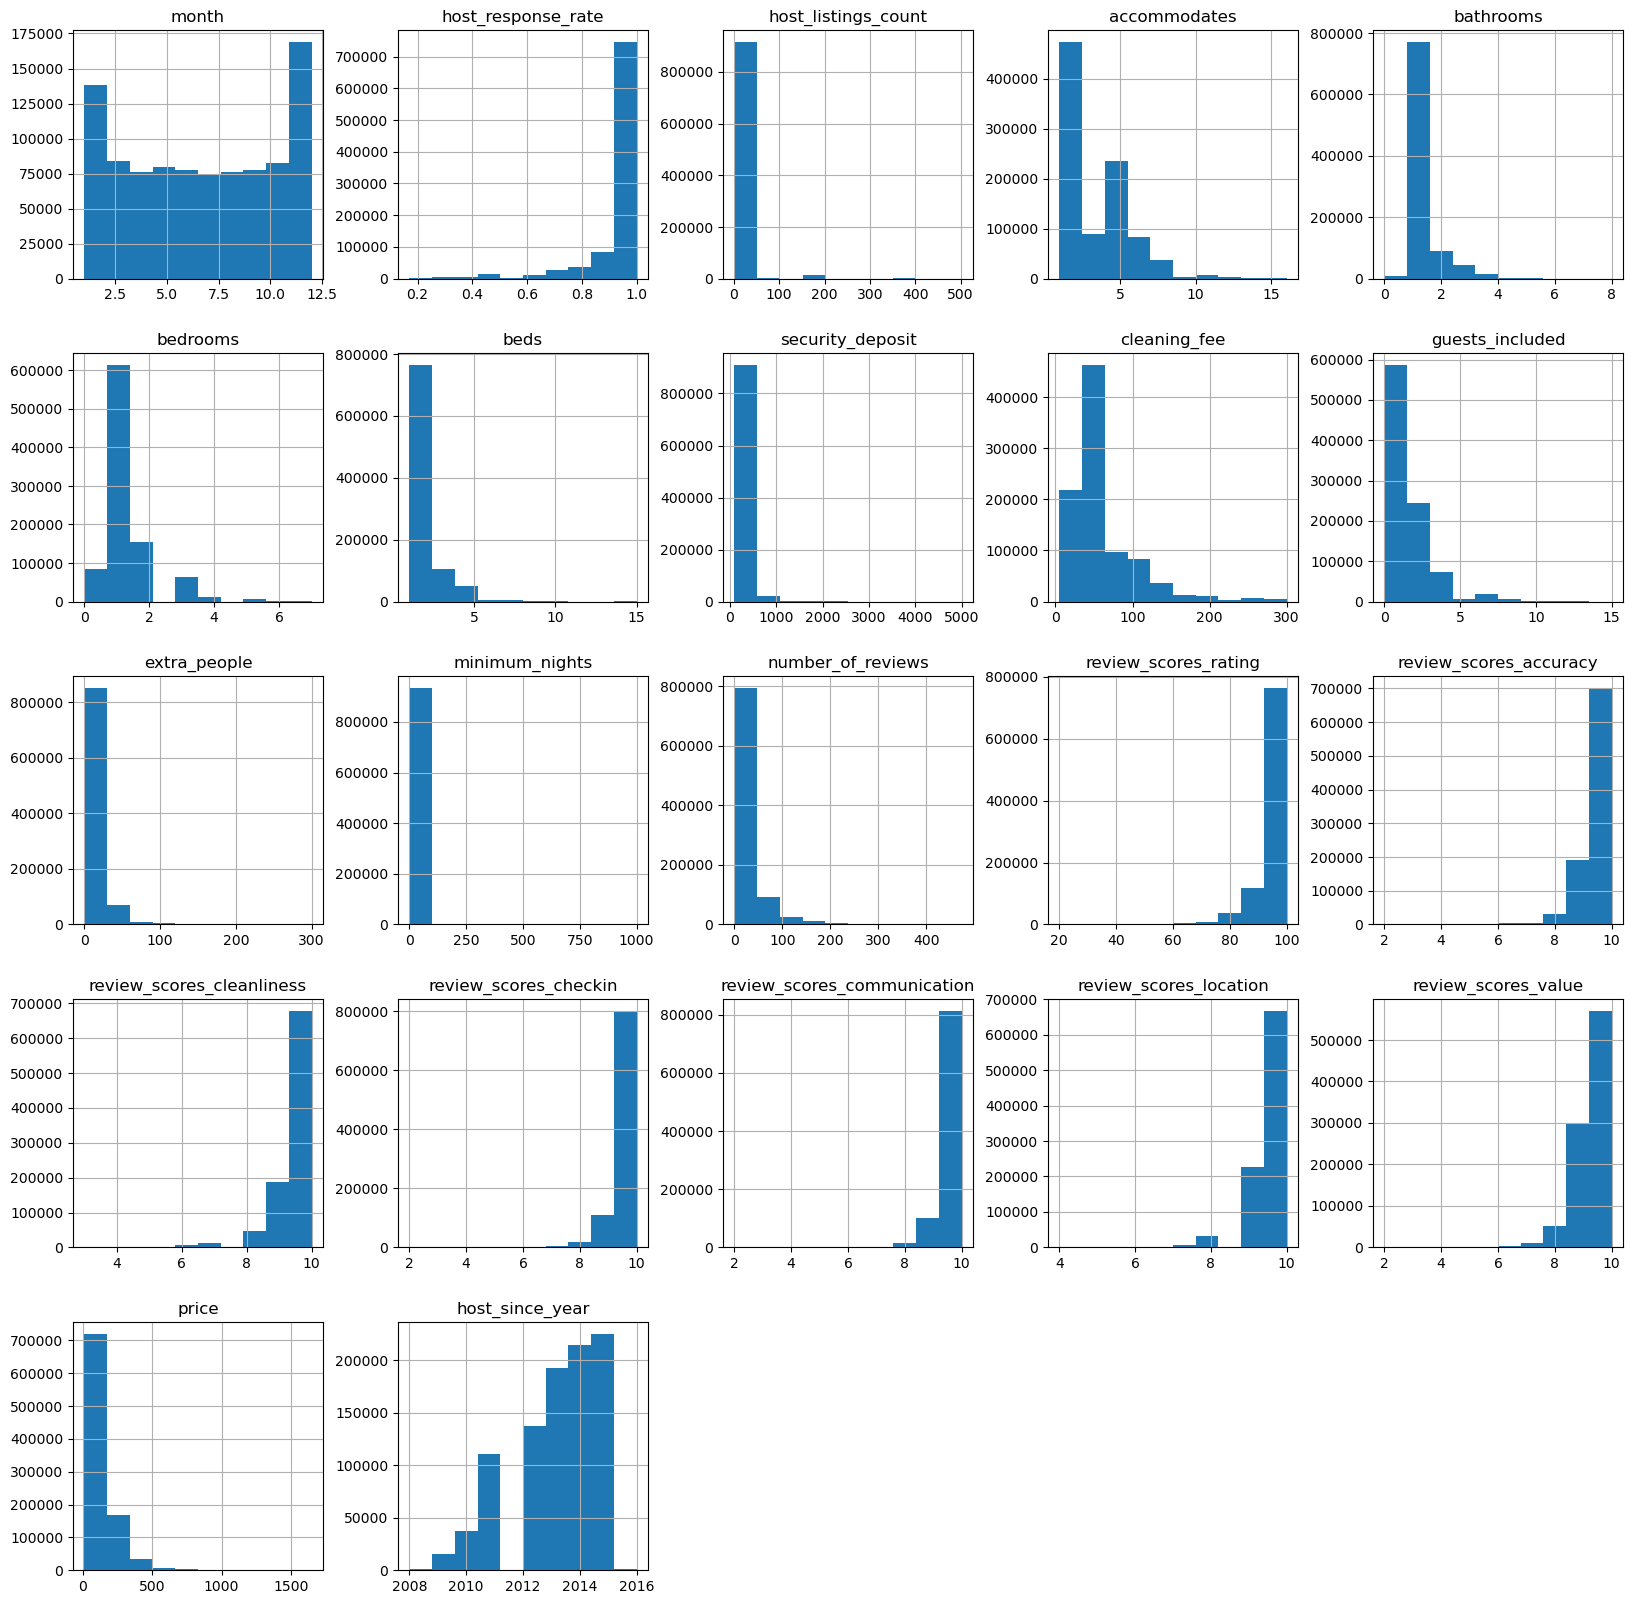

In [36]:
#check the distribution of each value
df_m_other_c.hist(figsize=(20,20))
plt.show()


### Step 3: now we look for the highest correlations with price with a heatmap and a list / candle stick chart.

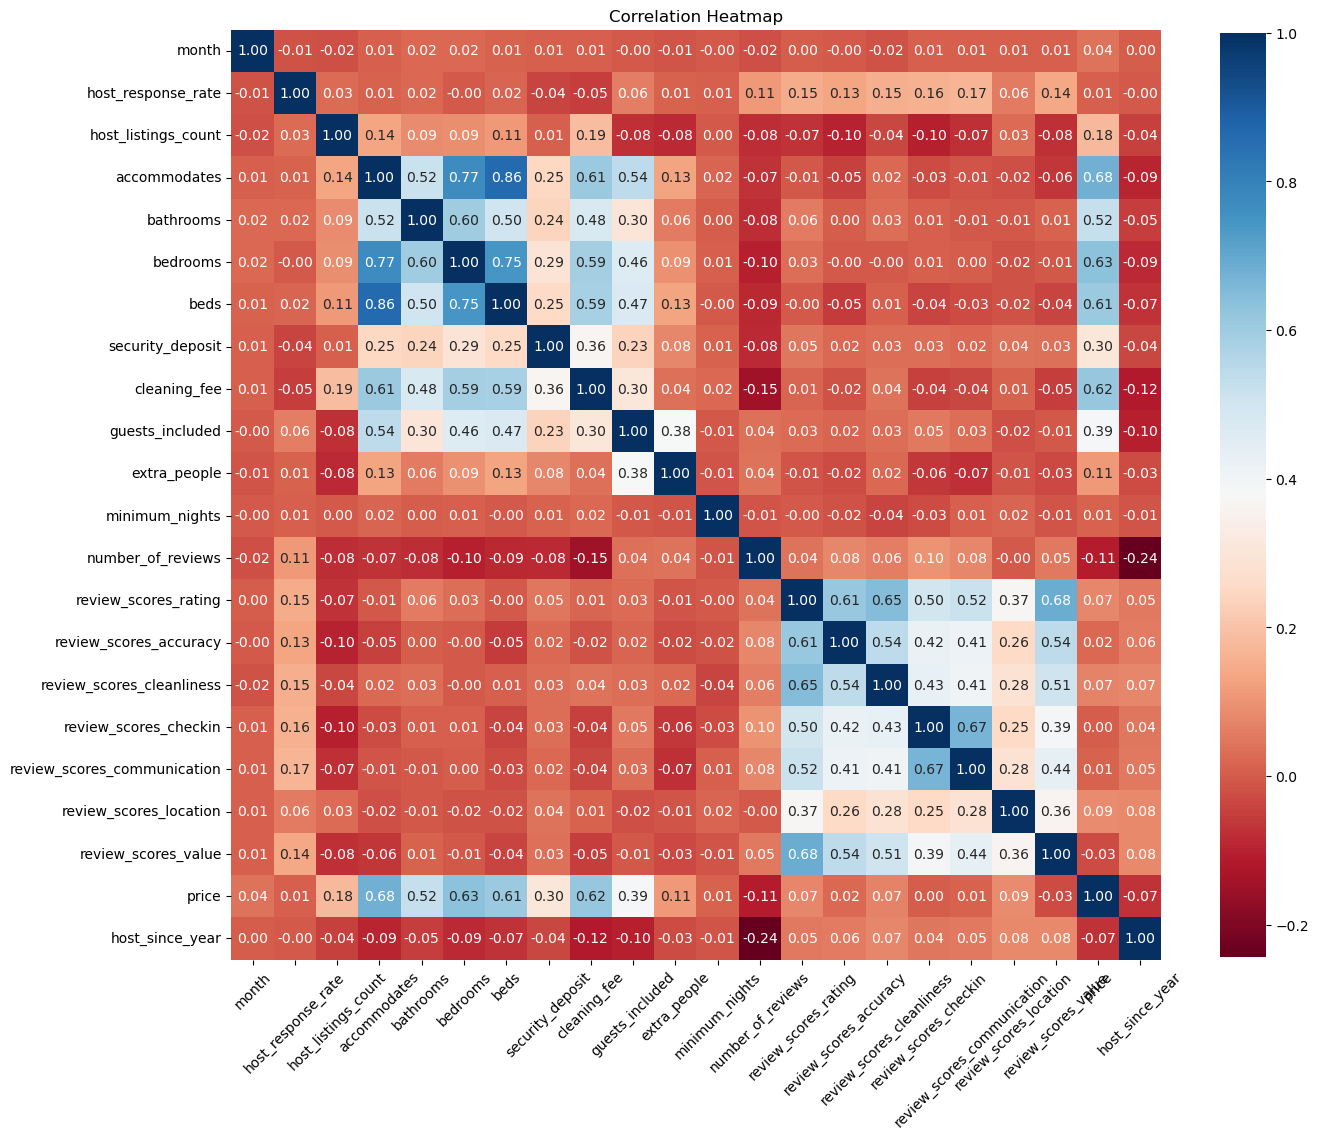

In [37]:
# Calculate the Heat Map/Correlation Matrix
corr = df_m_other_c.corr()

# Create a Heat Map with annotations
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', square=True, cbar_kws={"shrink": .8}) # alternative colours: 'coolwarm' cool to warm colors, 'RdBu' red-to-blue, 'Spectral'

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


In [38]:
df_m_other_c.corr()['price'].sort_values(ascending=False) # Highest correlations with price

price                          1.000000
accommodates                   0.676054
bedrooms                       0.631540
cleaning_fee                   0.619841
beds                           0.608799
bathrooms                      0.524907
guests_included                0.386744
security_deposit               0.304740
host_listings_count            0.179391
extra_people                   0.107330
review_scores_location         0.087206
review_scores_rating           0.074004
review_scores_cleanliness      0.072384
month                          0.041871
review_scores_accuracy         0.024272
review_scores_communication    0.012819
minimum_nights                 0.012260
host_response_rate             0.005352
review_scores_checkin          0.003330
review_scores_value           -0.028671
host_since_year               -0.071018
number_of_reviews             -0.108826
Name: price, dtype: float64

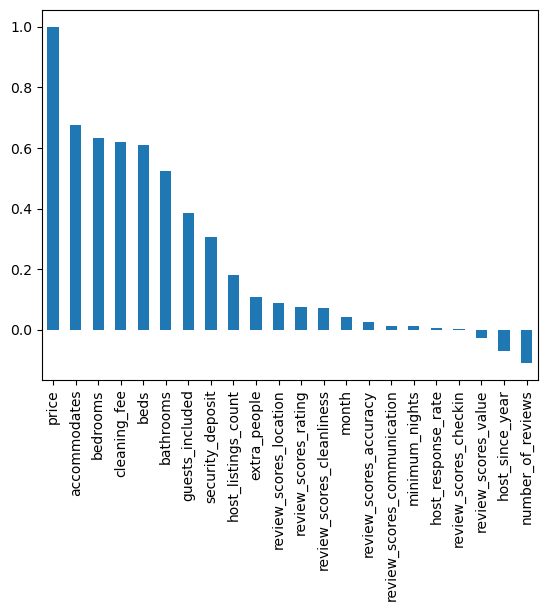

In [39]:
df_m_other_c.corr()['price'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()


In [40]:
# df_m_other_c.info()

In [41]:
df_m_other_c.corr()['price'].sort_values(ascending=False) # Highest correlations with price

price                          1.000000
accommodates                   0.676054
bedrooms                       0.631540
cleaning_fee                   0.619841
beds                           0.608799
bathrooms                      0.524907
guests_included                0.386744
security_deposit               0.304740
host_listings_count            0.179391
extra_people                   0.107330
review_scores_location         0.087206
review_scores_rating           0.074004
review_scores_cleanliness      0.072384
month                          0.041871
review_scores_accuracy         0.024272
review_scores_communication    0.012819
minimum_nights                 0.012260
host_response_rate             0.005352
review_scores_checkin          0.003330
review_scores_value           -0.028671
host_since_year               -0.071018
number_of_reviews             -0.108826
Name: price, dtype: float64

### Conclusion: Unsurprisingly, the price depends heavily on size-related criteria: accommodates, bedrooms, cleaning_fee, beds, bathrooms, guests_included, extra_people. Also quite predictable, the various review criteria play a strong role (high correlation).

### Step 5: In a next step we look on other features (next to size-related criteria) with categorical values the 'amenities'.

In [42]:
# Anaylsys of possible values of each column (used further down for analysys on on further criterias (categorical values)
# used once -> switched off as to long result

# for column in df_m.columns: # using df_m as origional dataframe without correktions/deletions
#    unique_values = df_m[column].unique()
#    print(f"Unique values for column '{column}':\n{unique_values}\n")

In [43]:
df_m.amenities.head() # looking for categorical values in column 'amenities'

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,"Cable TV",Internet,"Wireless Internet","A...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {TV,"Cable TV",Internet,"Wireless Internet","A...
4    {TV,"Cable TV",Internet,"Wireless Internet","A...
Name: amenities, dtype: object

In [44]:
# Create a list of all unique 'amenities'

df_amenities_all = []
for x in df_m.amenities:
    df_amenities_all.extend(x.replace('{','').replace('}','').replace('"','').split(','))

# Convert the list to a Pandas Series
df_amenities_all_series = pd.Series(df_amenities_all)

# Use pd.unique() on the Series
df_amenities_all_unique = pd.unique(df_amenities_all_series)
df_amenities_all_unique


array(['TV', 'Cable TV', 'Internet', 'Wireless Internet',
       'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly',
       'Washer', 'Dryer', 'Free Parking on Premises',
       'Buzzer/Wireless Intercom', 'Smoke Detector',
       'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card',
       'Fire Extinguisher', 'Essentials', 'Pets Allowed',
       'Pets live on this property', 'Dog(s)', 'Cat(s)', 'Hot Tub',
       'Indoor Fireplace', 'Shampoo', 'Breakfast', '24-Hour Check-in',
       'Hangers', 'Hair Dryer', 'Iron', 'Laptop Friendly Workspace',
       'Suitable for Events', 'Elevator in Building',
       'Lock on Bedroom Door', 'Wheelchair Accessible', 'Gym', '', 'Pool',
       'Smoking Allowed', 'Other pet(s)', 'Doorman', 'Washer / Dryer'],
      dtype=object)

In [45]:
# create an empty dataframe with columns for all unique 'amenities'

empty_matrix = np.zeros((len(df_m), len(df_amenities_all_unique))) # Create an empty matrix with zeros

dummies_amenities = pd.DataFrame(empty_matrix, columns=df_amenities_all_unique) # Create a DataFrame with the unique amenities as columns

dummies_amenities

,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
934538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
934539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
934540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# fill the empty dataframe

for i,ament in enumerate(df_m.amenities):
    indices = dummies_amenities.columns.get_indexer(ament.replace('{','').replace('}','').replace('"','').split(','))
    dummies_amenities.iloc[i,indices]=1

dummies_amenities


,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934537,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
934538,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
934539,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
934540,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


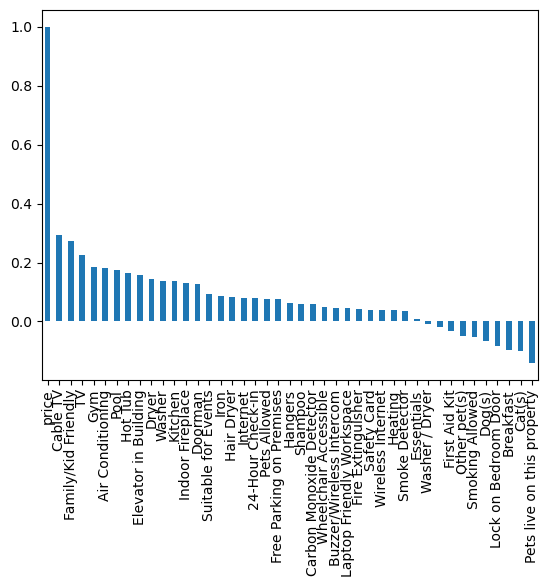

In [47]:
# create a dataframe df_price_amenities with price and amenities (dummies) and create candle stick chart

df_price_amenities = pd.concat([df_m_other_c['price'],dummies_amenities],axis=1)
df_price_amenities.corr()['price'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()


In [48]:
df_price_amenities.corr()['price'].sort_values(ascending=False) # Highest correlations with price and amenities 

price                         1.000000
Cable TV                      0.293259
Family/Kid Friendly           0.272647
TV                            0.223909
Gym                           0.183889
Air Conditioning              0.182768
Pool                          0.175241
Hot Tub                       0.165033
Elevator in Building          0.158773
Dryer                         0.143666
Washer                        0.138511
Kitchen                       0.136932
Indoor Fireplace              0.129303
Doorman                       0.125590
Suitable for Events           0.091712
Iron                          0.087812
Hair Dryer                    0.082039
Internet                      0.079655
24-Hour Check-in              0.078651
Pets Allowed                  0.077637
Free Parking on Premises      0.076406
Hangers                       0.061150
Shampoo                       0.060043
Carbon Monoxide Detector      0.059756
Wheelchair Accessible         0.048156
Buzzer/Wireless Intercom 

### Conclusion: There are several amenities that have a correlation, but overall a rather weak one, with price: Cable TV/TV, Family/Kid Friendliness, Gym, Air Conditioning
Interestingly, comfortable/luxurious amenities such as gym, air conditioning, pool, elevator in the building have a weaker correlation with price than TV.

## Question 4: What might be a valid predictor of a “reasonable” price for potential hosts or guests?
### Step 1: Finally we make a price prediction with linear regression

In [49]:
# Copy df_m_c to df_m_c1 for further data preparation
df_m_c1 = df_m_c.copy()   # "c1" means coppy1 for further data preperations and linear regression analysys

# Deletion of all columns with Dtype 'object' exept of 'neighbourhood_group_cleansed', 'property_type' -> not used in this analysis

# Identify columns with dtype 'object'
object_columns = df_m_c1.select_dtypes(include=['object']).columns

# Specify the columns you want to keep
columns_to_keep = ['neighbourhood_group_cleansed', 'property_type']

# Filter out the columns to drop, keeping the specified ones
object_columns_to_drop = [col for col in object_columns if col not in columns_to_keep]

# Drop the identified columns from the DataFrame
df_m_c1 = df_m_c1.drop(object_columns_to_drop, axis=1)

df_m_c1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934542 entries, 0 to 934541
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   listing_id                      934542 non-null  int64  
 1   year                            934542 non-null  int32  
 2   month                           934542 non-null  int32  
 3   day_num                         934542 non-null  int32  
 4   host_listings_count             934450 non-null  float64
 5   neighbourhood_group_cleansed    934542 non-null  object 
 6   property_type                   934233 non-null  object 
 7   accommodates                    934542 non-null  int64  
 8   bathrooms                       929739 non-null  float64
 9   bedrooms                        932539 non-null  float64
 10  beds                            934177 non-null  float64
 11  guests_included                 934542 non-null  int64  
 12  minimum_nights  

In [50]:
# create a dateframe col_cat_pred with categorial values for 'neighbourhood_group_cleansed' and'property_type'  
col_cat_pred = ['neighbourhood_group_cleansed','property_type']
df_cat_pred = pd.get_dummies(df_m_c1[col_cat_pred],prefix_sep='_',drop_first=True, dummy_na=False)

df_cat_pred.head() # used once for check
# df_cat_pred.info()  # used once for check

,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,...,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# Specify the categorical columns you want to encode
col_cat_pred = ['neighbourhood_group_cleansed', 'property_type']

# integrate col_cat_pred back into df_m_c1
df_m_c1 = pd.concat([df_m_c1, pd.get_dummies(df_m_c1[col_cat_pred], prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

# Drop the original categorical columns 'neighbourhood_group_cleansed', 'property_type' -> no longer need for them
df_m_c1 = df_m_c1.drop(columns=col_cat_pred)

#df_m_c1.info() #used once for check


### Step 2: Modelling linear regression

In [52]:
# Preparing data for training machine learning model
y = df_m_c1.price  #y = df_num_pred.price
X = df_m_c1.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
X_train.shape


(654179, 52)

In [53]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Impute Missing Values bevore using Linear Regression with SimpleImputer
imputer = SimpleImputer(strategy='mean')  # strategy options: mean, median, most_frequent,...
# Fit the imputer on the training data and transform it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Apply the same transformation to the test set

#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) 

y_test_pred = lr_model.predict(X_test)
y_train_pred = lr_model.predict(X_train)

# Print model evaluation scores for training and test
print('Training Data:')
print('r-squared score: %.3f' % r2_score(y_train, y_train_pred))
print('---')
print('Test Data:')
print('r-squared score: %.3f' % r2_score(y_test, y_test_pred))
print('---')

Training Data:
r-squared score: 0.593
---
Test Data:
r-squared score: 0.595
---


### Step 3: Printing the residuals in a scatter plot

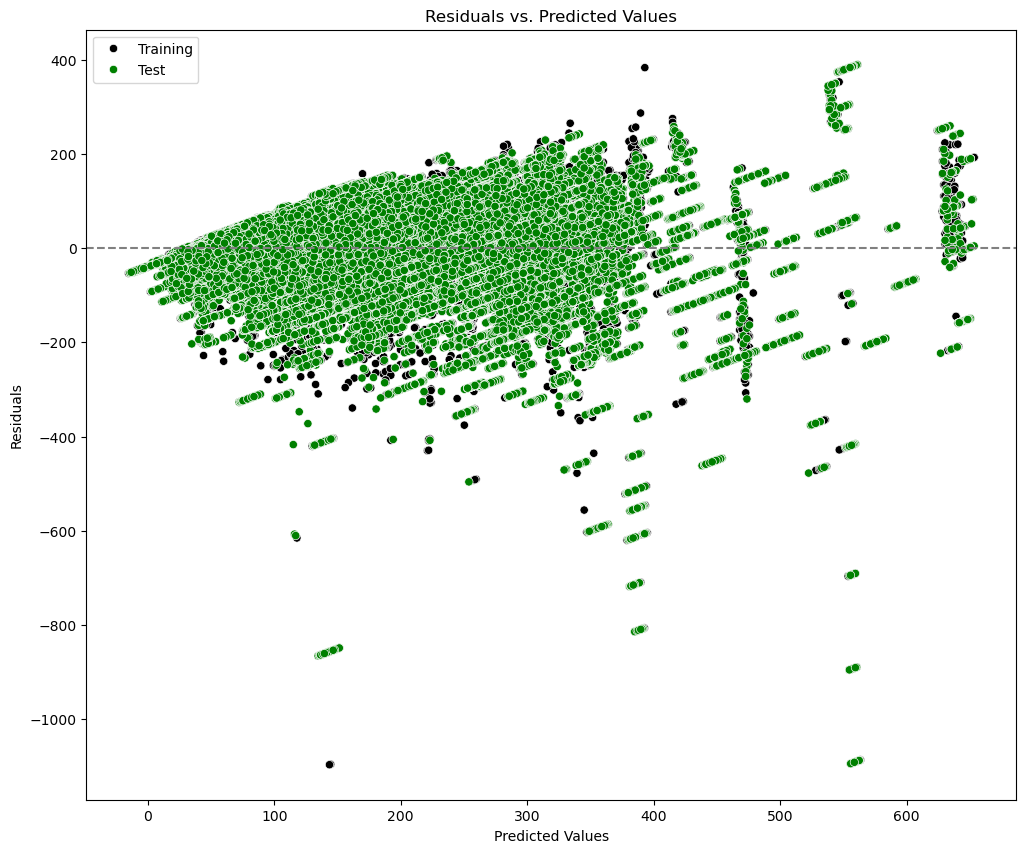

In [54]:
# Printing the residuals in a scatter plot 

# Create a DataFrame for the residuals
residuals_train = y_train_pred - y_train
residuals_test = y_test_pred - y_test

# Combine the data into a single DataFrame for easier plotting
residuals_df = pd.DataFrame({
    'Predicted': y_train_pred.tolist() + y_test_pred.tolist(),
    'Residuals': list(residuals_train) + list(residuals_test),
    'Data Type': ['Training'] * len(residuals_train) + ['Test'] * len(residuals_test)
})

# Create the scatter plot using seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(data=residuals_df, x='Predicted', y='Residuals', hue='Data Type', style='Data Type', markers=['o', 'o'], palette={'Training': 'black', 'Test': 'green'})

plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.legend(loc='upper left')
plt.show()


In [55]:
def coef_weights(coefficients, X):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X.columns
    coefs_df['coefs'] = lr_model.coef_
    coefs_df['abs_coefs'] = np.abs(lr_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df


# Top20 Highest Coefficiency
coef_df = coef_weights(lr_model.coef_,X)
coef_df.head(20)


,est_int,coefs,abs_coefs
5,accommodates,34.280468,34.280468
7,bedrooms,25.164321,25.164321
26,neighbourhood_group_cleansed_Downtown,18.594024,18.594024
6,bathrooms,18.346032,18.346032
32,neighbourhood_group_cleansed_Queen Anne,10.689382,10.689382
22,neighbourhood_group_cleansed_Capitol Hill,8.598559,8.598559
12,number_of_reviews,-7.582110,7.582110
13,review_scores_rating,7.137790,7.137790
19,review_scores_value,-6.872022,6.872022
4,host_listings_count,6.227320,6.227320


### Conclusion: 
The prediction model was built with Linear Regression and the model gives a R-squared score approximately of 0.6. 
Although this is not a particularly high R-squared score, it can at least be used to make a reasonably valid prediction of a reasonal price for patential hosts or guests.
As seen bevore the highest correlation with price have size-dependent criterias (accommodates, property type, bedrooms, bathrooms) and trendy neighborhoods (Downtown, Queen Anne, Capitol Hill) follwoed by review-criterias.     
